In [18]:
import pandas as pd
import seaborn as sns

In [19]:
base = pd.read_csv("Multiple Cause of Death, 1999-2020 Age Gender Year Race COD Socioec.txt", sep='\t', skipfooter=0)

In [41]:
base.describe()

,Notes,Year,Year Code,Deaths,Crude Rate,socioec quintile
count,0.0,121440.000000,121440.000000,100174.000000,7915.000000,121440.000000
mean,NaN,2009.500000,2009.500000,6.601314,6.352340,3.000000
std,NaN,6.344315,6.344315,33.370714,8.335494,1.414219
min,NaN,1999.000000,1999.000000,0.000000,0.974825,1.000000
25%,NaN,2004.000000,2004.000000,0.000000,2.027962,2.000000
50%,NaN,2009.500000,2009.500000,0.000000,3.395178,3.000000
75%,NaN,2015.000000,2015.000000,0.000000,7.517281,4.000000
max,NaN,2020.000000,2020.000000,1237.000000,94.996109,5.000000


In [20]:
base.head(3)

,Notes,Multiple Cause of death,Multiple Cause of death Code,Year,Year Code,Gender,Gender Code,Race,Race Code,Five-Year Age Groups,Five-Year Age Groups Code,Deaths,Population,Crude Rate,socioec quintile
0,NaN,Opium,T40.0,1999,1999,Female,F,American Indian or Alaska Native,1002-5,< 1 year,1,0,9033,Unreliable,1
1,NaN,Opium,T40.0,1999,1999,Female,F,American Indian or Alaska Native,1002-5,1-4 years,4-Jan,0,38452,Unreliable,1
2,NaN,Opium,T40.0,1999,1999,Female,F,American Indian or Alaska Native,1002-5,5-9 years,9-May,0,56191,Unreliable,1


## Dtypes

In [42]:
base.dtypes

Notes                           float64
Multiple Cause of death          object
Multiple Cause of death Code     object
Year                              int64
Year Code                         int64
Gender                           object
Gender Code                      object
Race                             object
Race Code                        object
Five-Year Age Groups             object
Five-Year Age Groups Code        object
Deaths                          float64
Population                       object
Crude Rate                      float64
socioec quintile                  int64
dtype: object

<Axes: xlabel='socioec quintile', ylabel='count'>

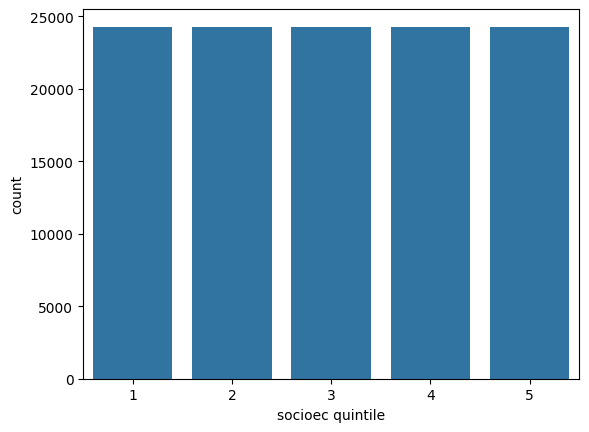

In [43]:
sns.countplot(data=base, x=base["socioec quintile"])

In [31]:
base["Crude Rate"] = pd.to_numeric(base["Crude Rate"], errors='coerce')
base["Deaths"] = pd.to_numeric(base["Deaths"], errors='coerce')

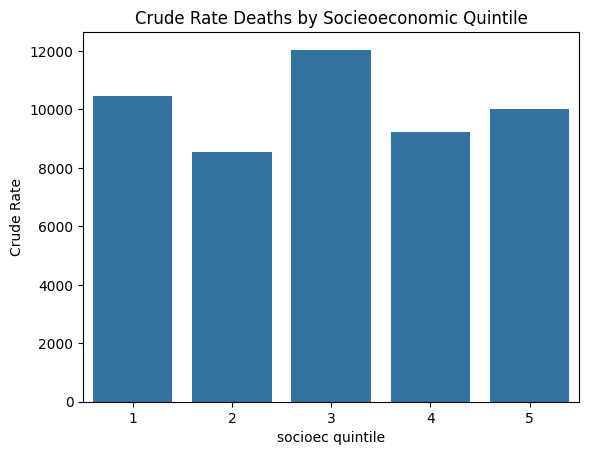

In [44]:
crude_rate_deaths_sum = base.groupby(["socioec quintile"])["Crude Rate"].sum().reset_index()
ax = sns.barplot(data= crude_rate_deaths_sum, 
            x="socioec quintile", y="Crude Rate").set(title="Crude Rate Deaths by Socieoeconomic Quintile")


<Axes: xlabel='socioec quintile', ylabel='Deaths'>

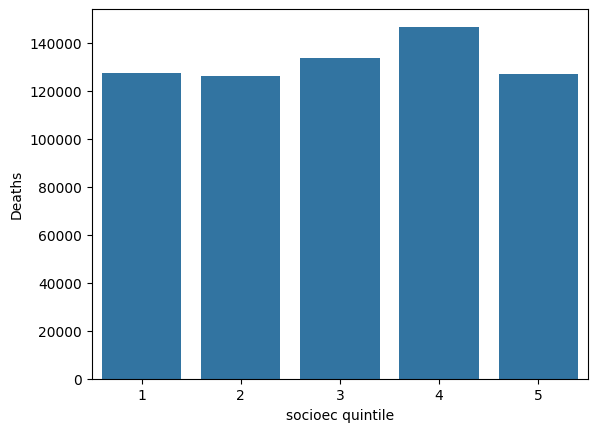

In [45]:
sns.barplot(data=base.groupby(["socioec quintile"])["Deaths"].sum().reset_index(), 
            x="socioec quintile", y="Deaths")

# Duplicates

## Outliers